In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


IMPORTING PYHTON LIBRARIES

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


READING THE DATASET

In [3]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


DATA CLEANING AND PREPROCESSING

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

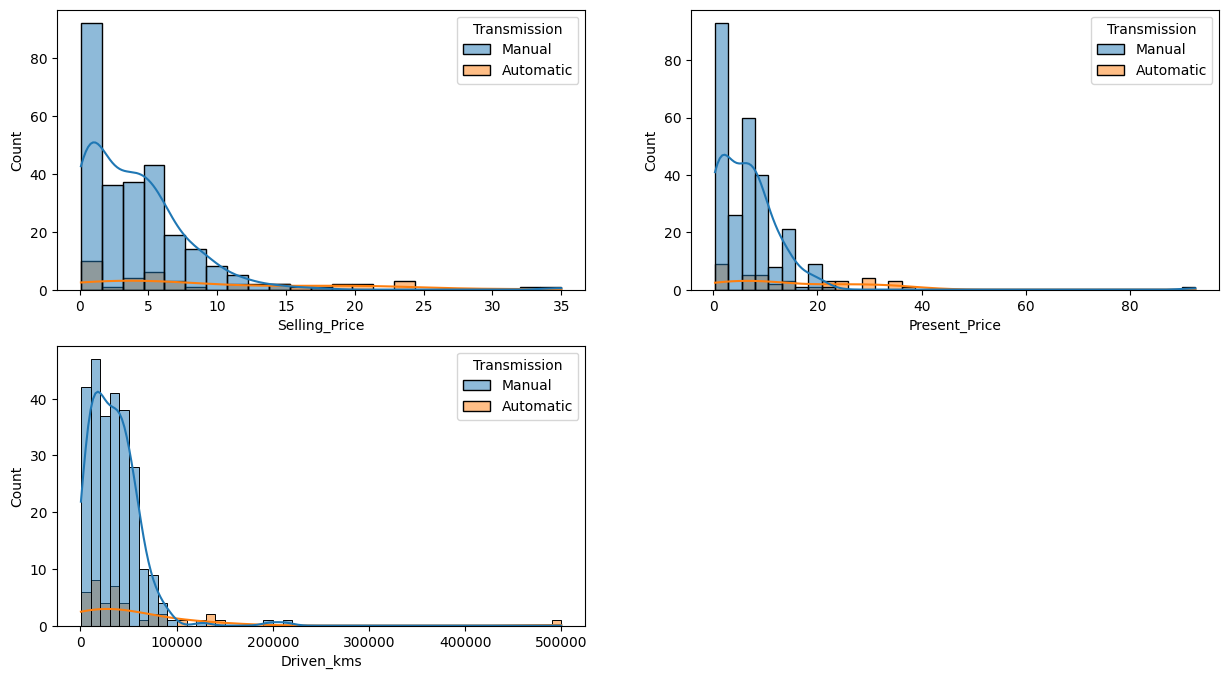

In [10]:
plt.figure(figsize = (15,8))
for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()

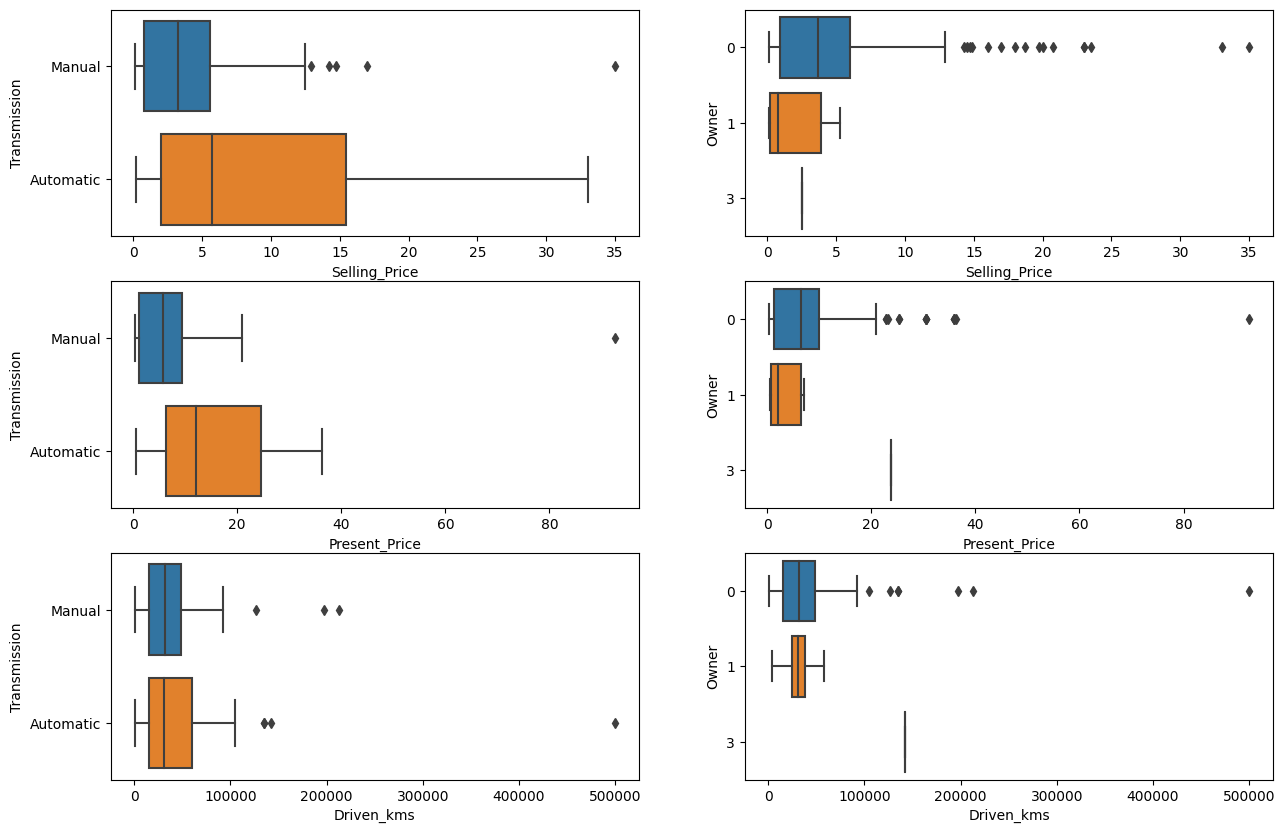

In [11]:
plt.figure(figsize = (15,10))
for i,col in enumerate(['Selling_Price','Present_Price', 'Driven_kms']):
    for j,col2 in enumerate(['Transmission', 'Owner']):
        plt.subplot(3,2,i * 2 + j + 1)
        sns.boxplot(data = df, y = col2,x = col,orient = 'h')

OUTLIERS

In [12]:
def outliers(col):
    per25 = df[col].quantile(0.25)
    per75 = df[col].quantile(0.75)
    IQR = per75 - per25               #Inter Quartile Range 
    UL = per75 + 1.5 * IQR            #Upper Limit
    LL = per25 - 1.5 * IQR            #Lower Limit
#     print("IQR - ",IQR)
#     print("Upper Limit & Lower Limit - ",UL,LL)
#     print(df[df[col]>UL],'\n',df[df[col]<LL])
    return df[col]>UL

In [13]:
df = df.drop(df[outliers('Selling_Price')].index)

In [14]:
df = df.drop(df[outliers('Present_Price')].index)
df = df.drop(df[outliers('Driven_kms')].index)

In [15]:
df['Transmission'].value_counts()

Transmission
Manual       253
Automatic     22
Name: count, dtype: int64

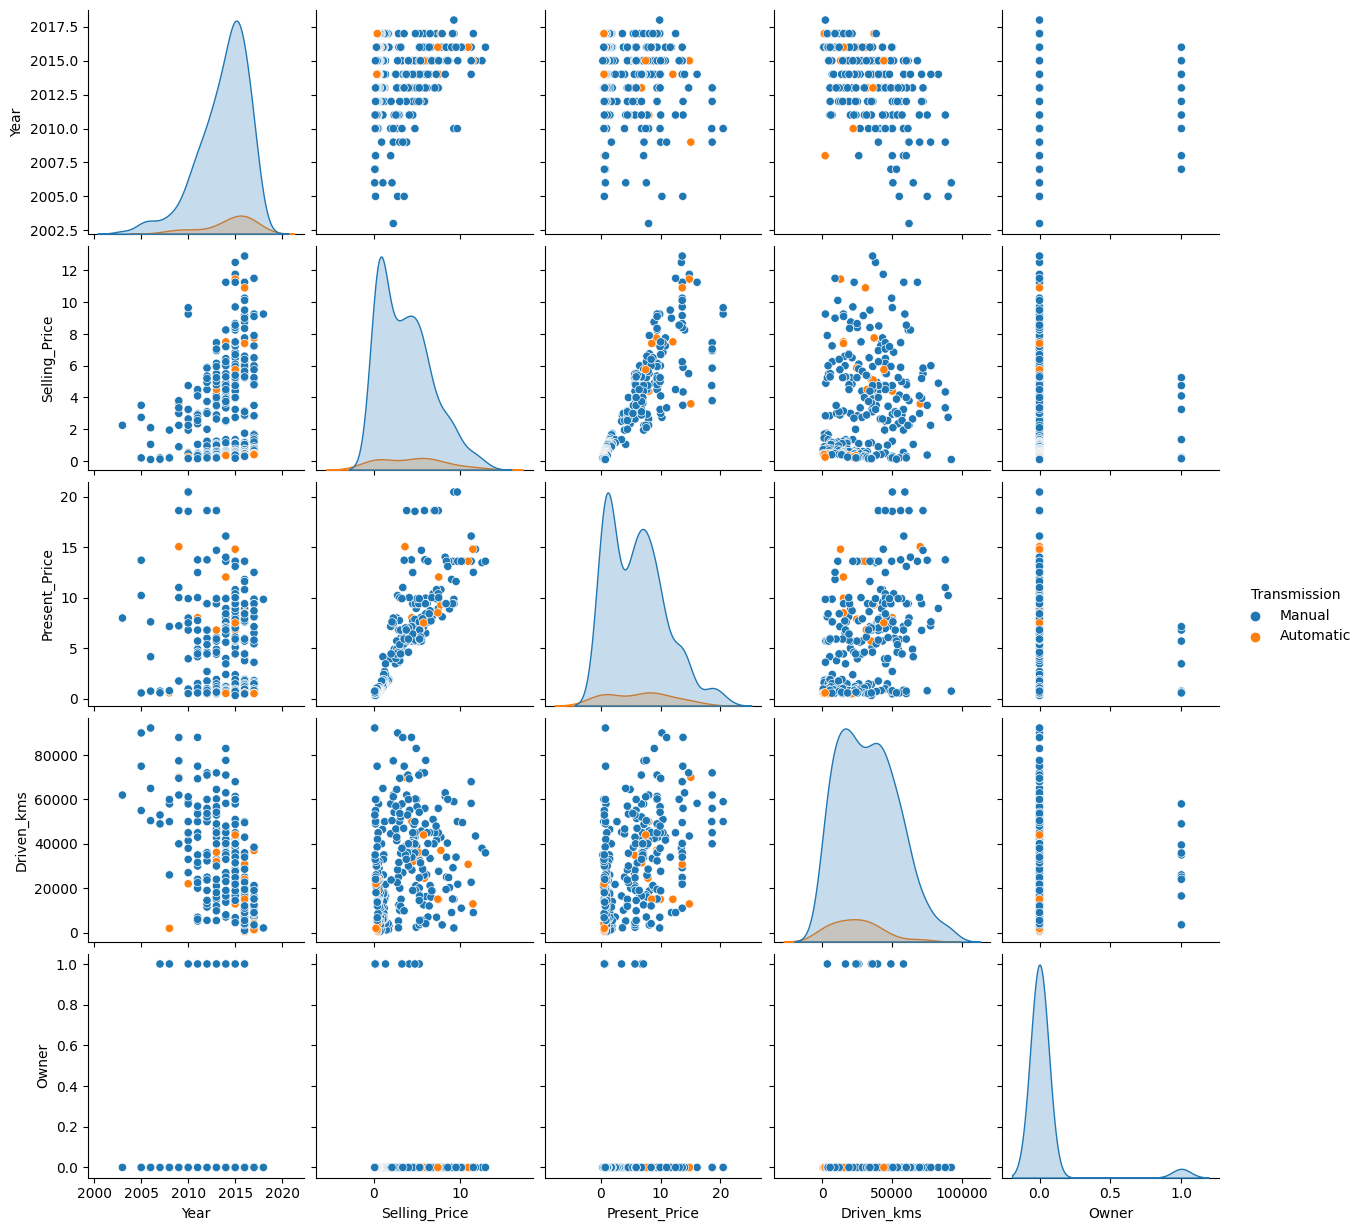

In [16]:
sns.pairplot(data = df , hue = 'Transmission')

In [17]:
Labelencode = LabelEncoder()

In [18]:
cat_vars = df.select_dtypes('O').columns
for i in cat_vars:
    
    df[i] = Labelencode.fit_transform(df[i])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


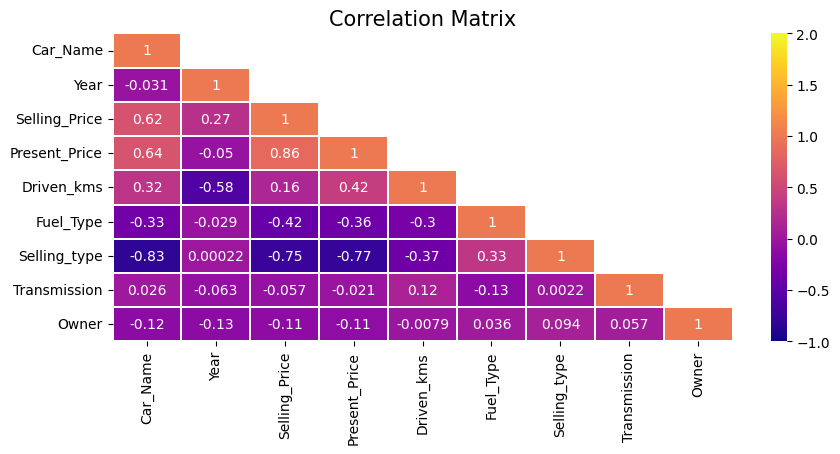

In [19]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [20]:
df.drop(columns = 'Selling_type',axis = 1,inplace=True)

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,1,0
1,89,2013,4.75,9.54,43000,1,1,0
2,66,2017,7.25,9.85,6900,2,1,0
3,92,2011,2.85,4.15,5200,2,1,0
4,88,2014,4.60,6.87,42450,1,1,0


MODEL BUILDING


In [22]:
Y = df['Selling_Price']
X = df.drop(columns = 'Selling_Price')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score



In [24]:
 X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

Mean Squared Error: 1.5249592946775155
R-squared: 0.8714781376599734


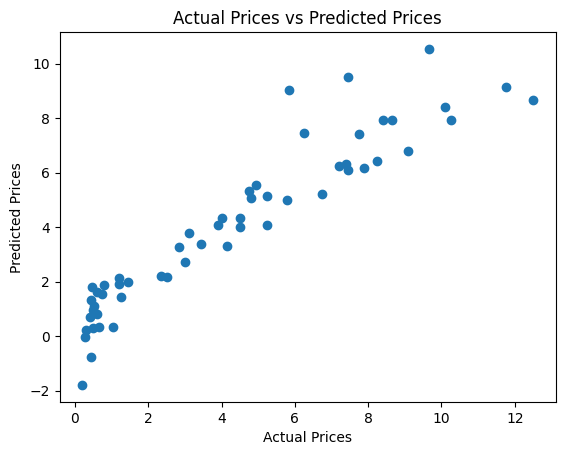

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [26]:
def predict(ml_model,X,Y):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
    rob=RobustScaler()
    X_train=rob.fit_transform(X_train)
    X_test=rob.fit_transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(model.score(X_test,y_test),mean_squared_error(y_test,y_pred,squared=False))

0.9104833573138703 1.0306056368062935


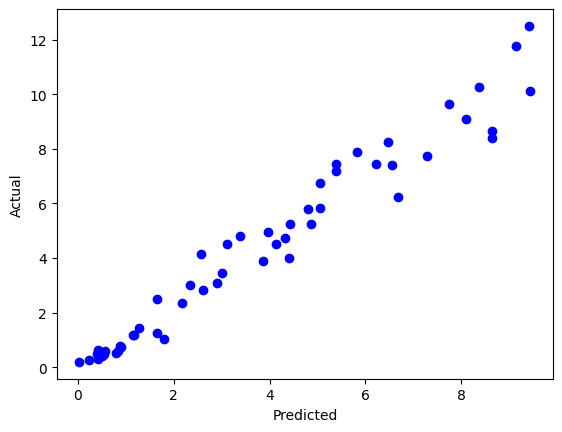

In [27]:
predict(LGBMRegressor(),X,Y)

0.9337601709912338 0.8865438511433037


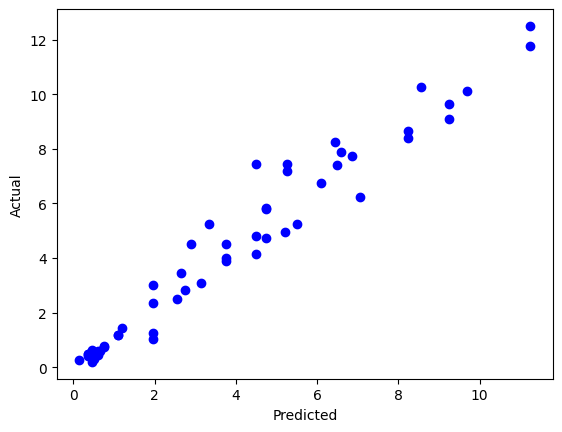

In [28]:
predict(DecisionTreeRegressor(),X,Y)

0.9104314456361128 1.0309044232217563


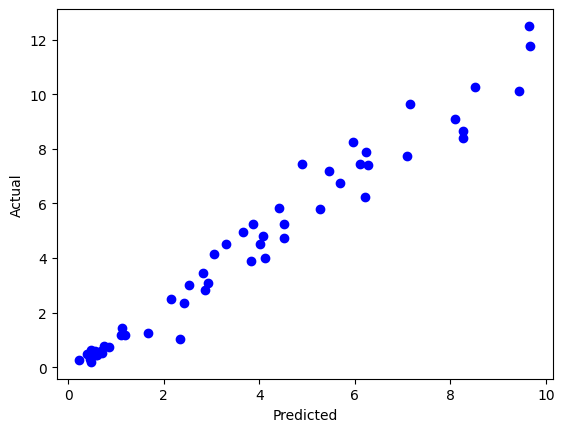

In [29]:
predict(RandomForestRegressor(),X,Y)

0.7810169341039397 1.6119289179004253


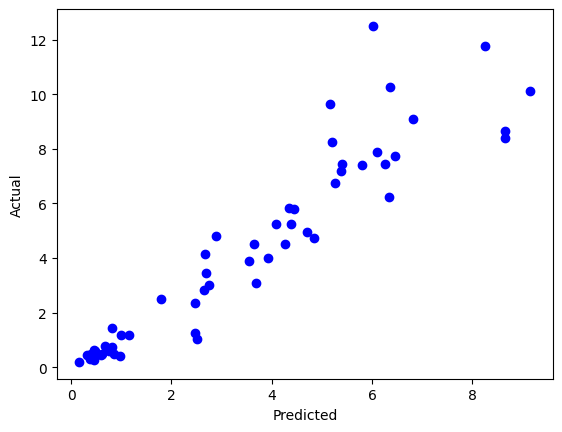

In [30]:
predict(KNeighborsRegressor(),X,Y)

0.9101701416790112 1.0324070891060197


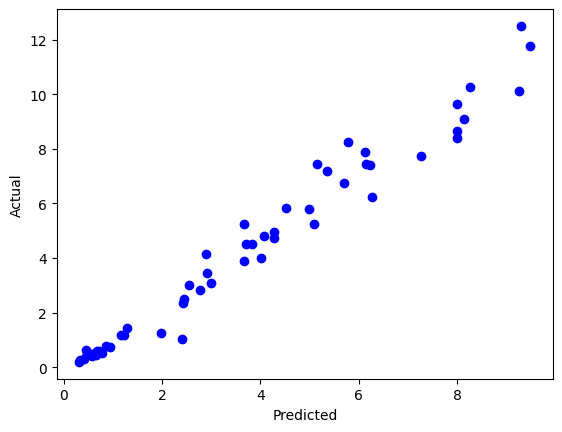

In [31]:
predict(ExtraTreesRegressor(),X,Y)

0.917240444828894 0.9909453280993605


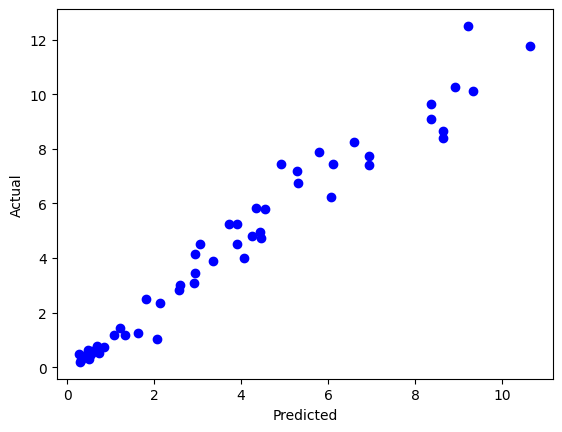

In [32]:
predict(GradientBoostingRegressor(),X,Y)

0.8202611246870681 1.4603657220356814


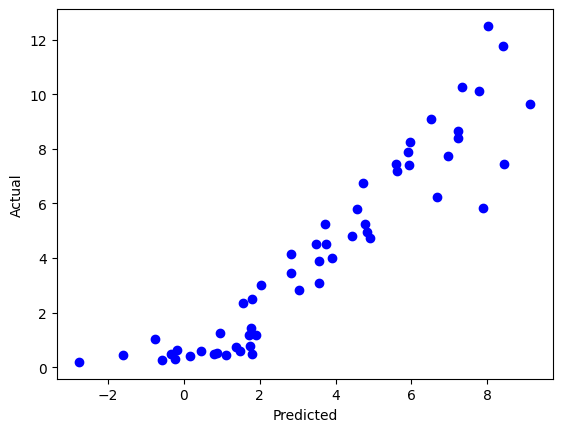

In [33]:
predict(Ridge(),X,Y)

0.34710979227351646 2.783304348479826


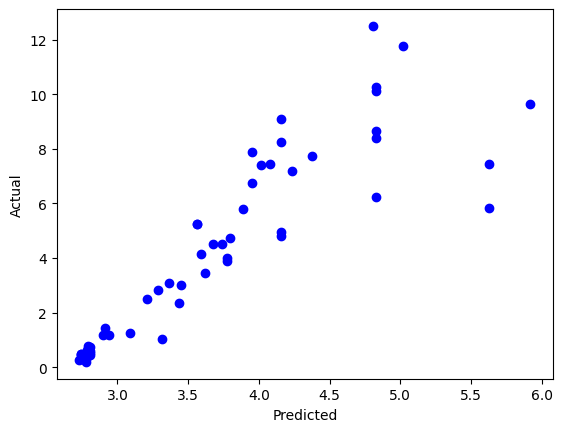

In [34]:
predict(Lasso(),X,Y)

0.8212552681033306 1.456321449347404


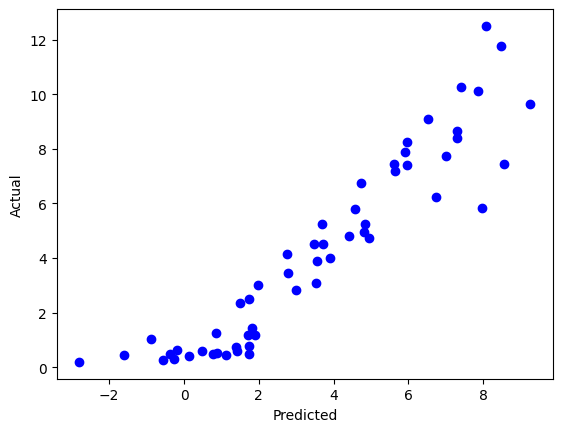

In [35]:
predict(LinearRegression(),X,Y)

In [36]:
def predict_mm(ml_model,X,Y):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
    mm=MinMaxScaler()
    x_train=mm.fit_transform(X_train)
    x_test=mm.fit_transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(model.score(X_test,y_test),mean_squared_error(y_test,y_pred,squared=False))

0.9513436811010836 0.759819167871118


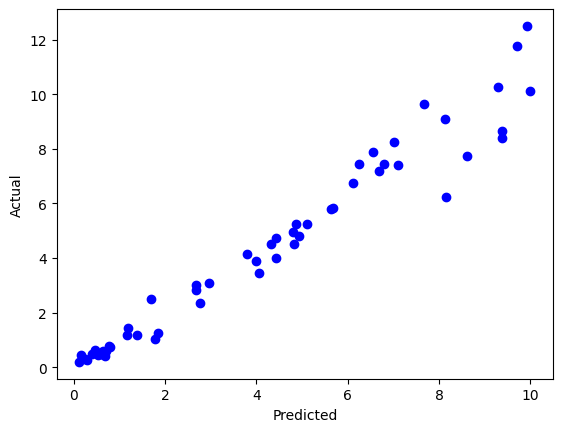

In [37]:
predict_mm(LGBMRegressor(),X,Y)


0.9403723854956899 0.8411323536540704


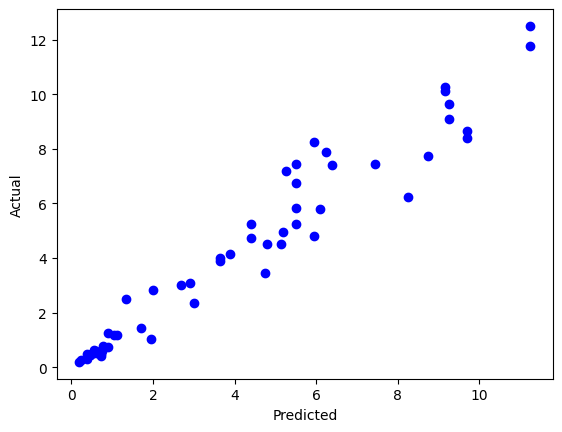

In [38]:
predict_mm(DecisionTreeRegressor(),X,Y)


-0.2511238135992322 3.8529268685695888


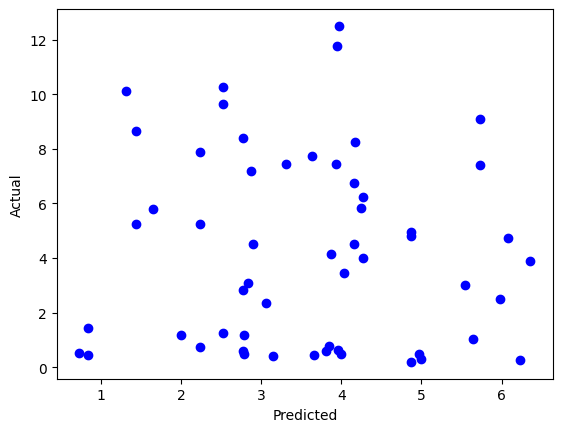

In [39]:
predict_mm(KNeighborsRegressor(),X,Y)


0.9551049731362669 0.729860295349236


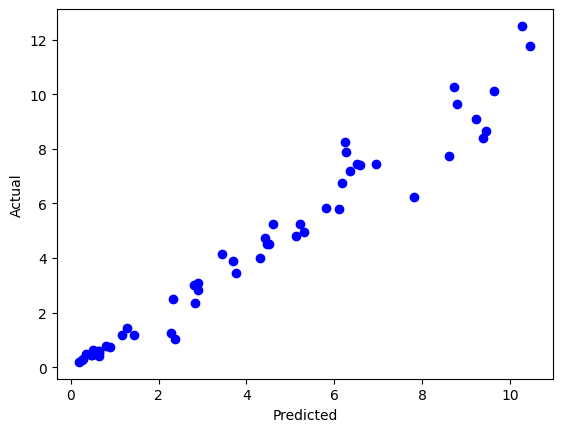

In [40]:
predict_mm(ExtraTreesRegressor(),X,Y)


0.9691391061289738 0.6051246872119386


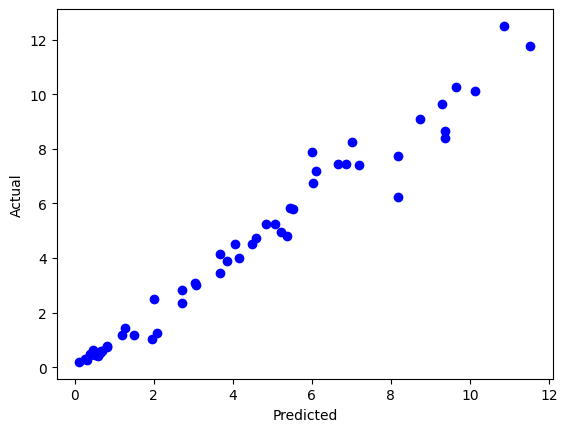

In [41]:
predict_mm(GradientBoostingRegressor(),X,Y)


0.8711048543540584 1.2366844540005395


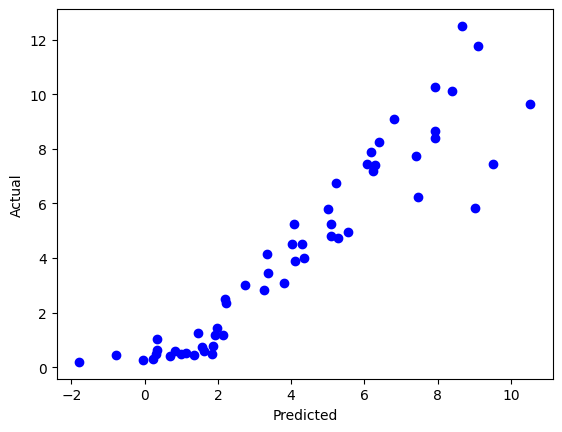

In [42]:
predict_mm(Ridge(),X,Y)


0.8271410117116462 1.4321437236860448


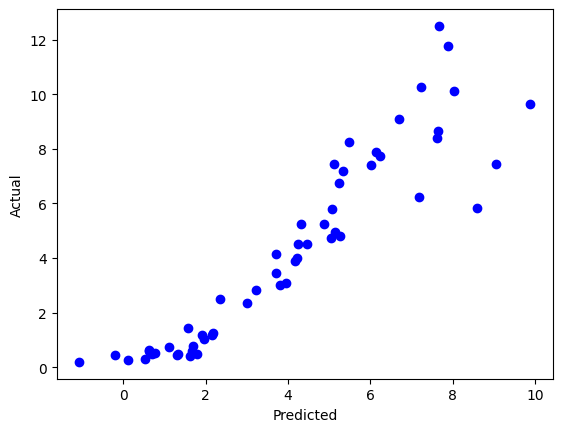

In [43]:
predict_mm(Lasso(),X,Y)


0.8714781376599734 1.2348924223095368


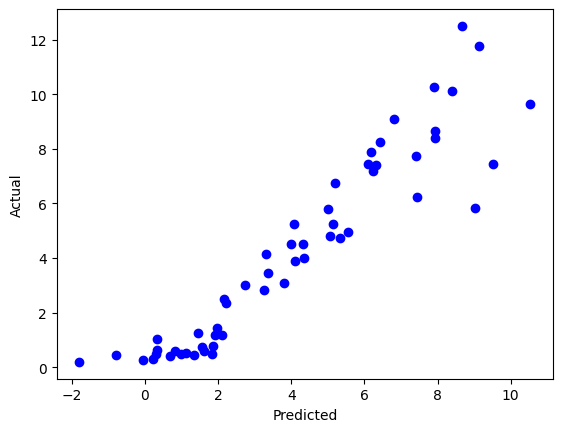

In [44]:
predict_mm(LinearRegression(),X,Y)

In [45]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)

In [46]:
X_test = scale.transform(X_test)

In [47]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2,3, 6, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',  
                           cv=kf,  
                           n_jobs=-1) 

In [48]:
grid_search.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=KFold(n_splits=15, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 3, 6, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [49]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of -0.677191539463341 using {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 50}


PLOT THE PREDICTED DATA USING PLOT LIBRARIES

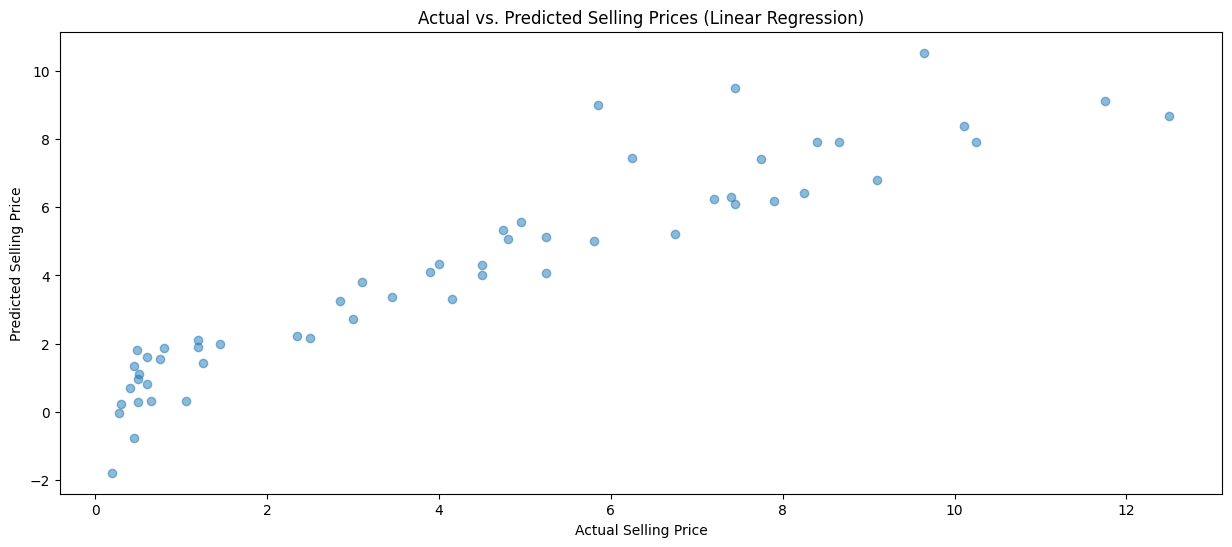

In [50]:
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()